In [708]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [709]:
incomeData_train = pd.read_csv("AdultTrain.csv")
incomeData_test = pd.read_csv("AdultTest.csv")

In [710]:
incomeData_train

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [711]:
incomeData_test

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [712]:
incomeData_train.isin([' ?']).sum()
incomeData_train = incomeData_train.replace(' ?', np.nan)
incomeData_train.isin([' ?']).sum()
incomeData_train.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Income               0
dtype: int64

In [713]:
incomeData_test.isin([' ?']).sum()
incomeData_test = incomeData_test.replace(' ?', np.nan)
incomeData_test.isin([' ?']).sum()
incomeData_test.isnull().sum()

Age                 0
Workclass         963
Fnlwgt              0
Education           0
Education-num       0
Marital-status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hours-per-week      0
Native-country    274
Income              0
dtype: int64

In [714]:
incomeData_train.describe() 

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


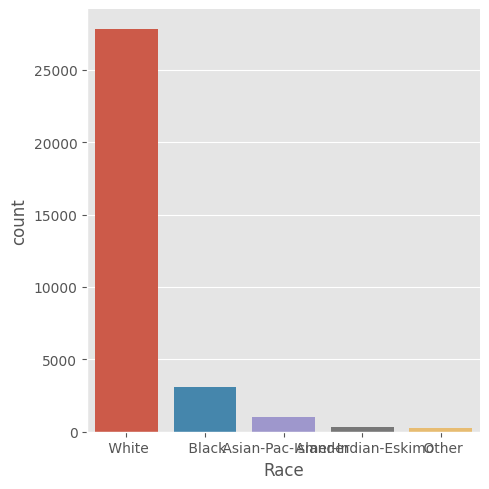

In [715]:
sns.catplot(x='Race', data = incomeData_train, kind = 'count')

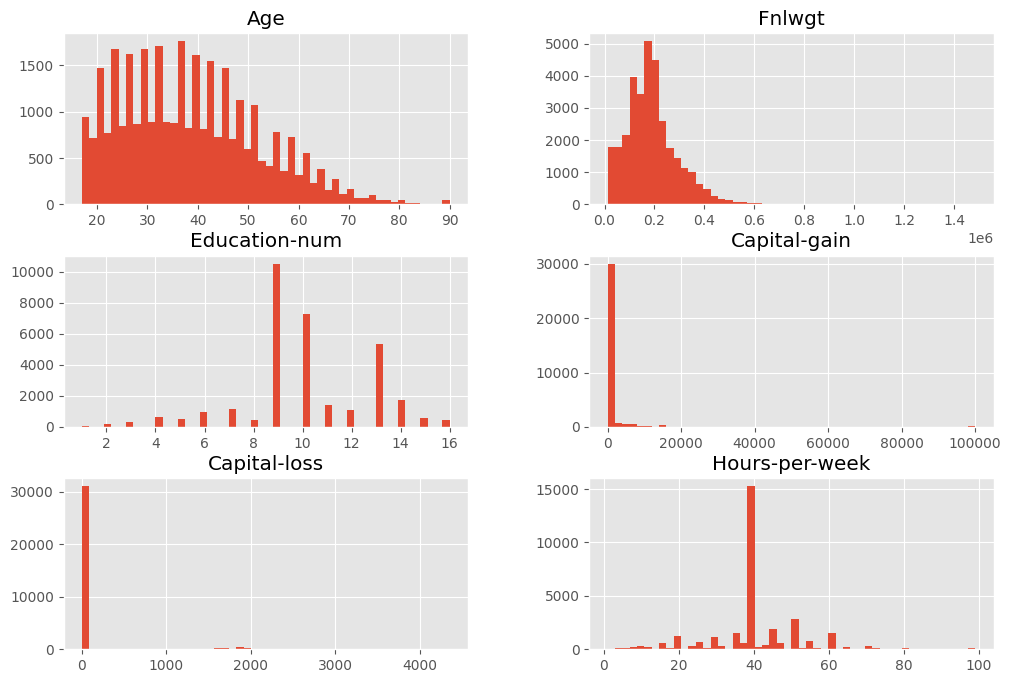

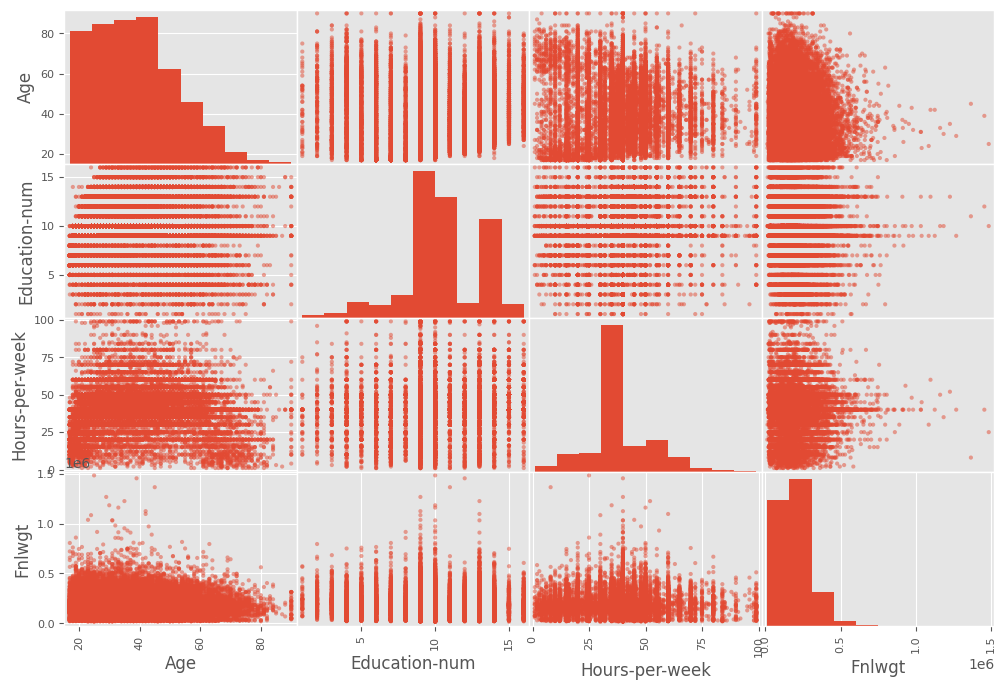

In [716]:
incomeData_train.hist(bins=50, figsize=(12, 8))
plt.show()

from pandas.plotting import scatter_matrix
attributes = ["Age", "Education-num", "Hours-per-week","Fnlwgt"]
scatter_matrix(incomeData_train[attributes], figsize=(12, 8))
plt.show()

In [717]:
incomeData_train.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

In [718]:
incomeData_test.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

In [719]:
incomeData_train.drop(columns = ['Education'])

income_cat = incomeData_train[["Workclass"]]
income_cat.head(8)

allIncome = incomeData_train['Income'].value_counts(normalize = True)
allIncome*100

Income
 <=50K    75.919044
 >50K     24.080956
Name: proportion, dtype: float64

In [720]:
incomeData_test.drop(columns = ['Education'])

income_cat2 = incomeData_test[["Workclass"]]
income_cat2.head(8)

allIncome2 = incomeData_test['Income'].value_counts(normalize = True)
allIncome2*100

Income
 <=50K    76.377372
 >50K     23.622628
Name: proportion, dtype: float64

In [721]:
for dataset in [incomeData_train]:
    dataset.loc[dataset['Native-country'] != ' United-States', 'Native-country'] = 0
    dataset.loc[dataset['Native-country'] == ' United-States', 'Native-country'] = 1
    dataset.loc[dataset['Race'] != ' White', 'Race'] = 0
    dataset.loc[dataset['Race'] == ' White', 'Race'] = 1
    dataset.loc[dataset['Workclass'] != ' Private', 'Workclass'] = 0
    dataset.loc[dataset['Workclass'] == ' Private', 'Workclass'] = 1
    dataset.loc[dataset['Hours-per-week'] <= 40, 'Hours-per-week'] = 0
    dataset.loc[dataset['Hours-per-week'] > 40, 'Hours-per-week'] = 1

for col in incomeData_train[incomeData_train.columns]:
    if incomeData_train[col].dtypes == 'object':
        le = LabelEncoder()
        incomeData_train[col] = le.fit_transform(incomeData_train[col])

In [722]:
for dataset in [incomeData_test]:
    dataset.loc[dataset['Native-country'] != ' United-States', 'Native-country'] = 0
    dataset.loc[dataset['Native-country'] == ' United-States', 'Native-country'] = 1
    dataset.loc[dataset['Race'] != ' White', 'Race'] = 0
    dataset.loc[dataset['Race'] == ' White', 'Race'] = 1
    dataset.loc[dataset['Workclass'] != ' Private', 'Workclass'] = 0
    dataset.loc[dataset['Workclass'] == ' Private', 'Workclass'] = 1
    dataset.loc[dataset['Hours-per-week'] <= 40, 'Hours-per-week'] = 0
    dataset.loc[dataset['Hours-per-week'] > 40, 'Hours-per-week'] = 1

for col in incomeData_test[incomeData_train.columns]:
    if incomeData_test[col].dtypes == 'object':
        le = LabelEncoder()
        incomeData_test[col] = le.fit_transform(incomeData_test[col])

In [723]:
incomeData_train

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,0,77516,9,13,4,0,1,1,1,2174,0,0,1,0
1,50,0,83311,9,13,2,3,0,1,1,0,0,0,1,0
2,38,1,215646,11,9,0,5,1,1,1,0,0,0,1,0
3,53,1,234721,1,7,2,5,0,0,1,0,0,0,1,0
4,28,1,338409,9,13,2,9,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,257302,7,12,2,12,5,1,0,0,0,0,1,0
32557,40,1,154374,11,9,2,6,0,1,1,0,0,0,1,1
32558,58,1,151910,11,9,6,0,4,1,0,0,0,0,1,0
32559,22,1,201490,11,9,4,0,3,1,1,0,0,0,1,0


In [724]:
incomeData_test

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,1,226802,1,7,4,6,3,0,1,0,0,0,1,0
1,38,1,89814,11,9,2,4,0,1,1,0,0,1,1,0
2,28,0,336951,7,12,2,10,0,1,1,0,0,0,1,1
3,44,1,160323,15,10,2,6,0,0,1,7688,0,0,1,1
4,18,0,103497,15,10,4,14,3,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,1,215419,9,13,0,9,1,1,0,0,0,0,1,0
16277,64,0,321403,11,9,6,14,2,0,1,0,0,0,1,0
16278,38,1,374983,9,13,2,9,0,1,1,0,0,1,1,0
16279,44,1,83891,9,13,0,0,3,0,1,5455,0,0,1,0


In [725]:
incomeData_train["Workclass"] = incomeData_train["Workclass"].fillna(incomeData_train["Workclass"].mode())
incomeData_train["Occupation"] = incomeData_train["Occupation"].fillna(incomeData_train["Occupation"].mode())
incomeData_train["Native-country"] = incomeData_train["Native-country"].fillna(incomeData_train["Native-country"].mode())

incomeData_test["Workclass"] = incomeData_test["Workclass"].fillna(incomeData_test["Workclass"].mode())
incomeData_test["Occupation"] = incomeData_test["Occupation"].fillna(incomeData_test["Occupation"].mode())
incomeData_test["Native-country"] = incomeData_test["Native-country"].fillna(incomeData_test["Native-country"].mode())



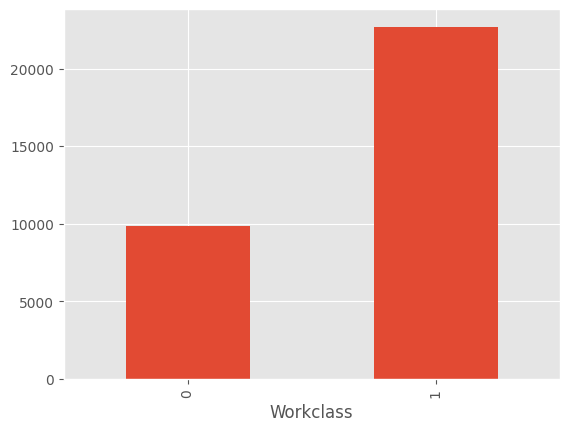

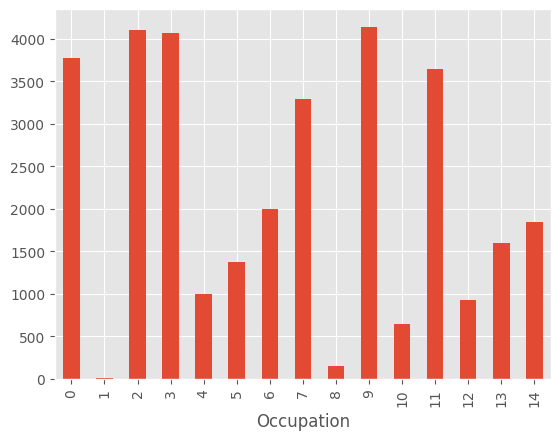

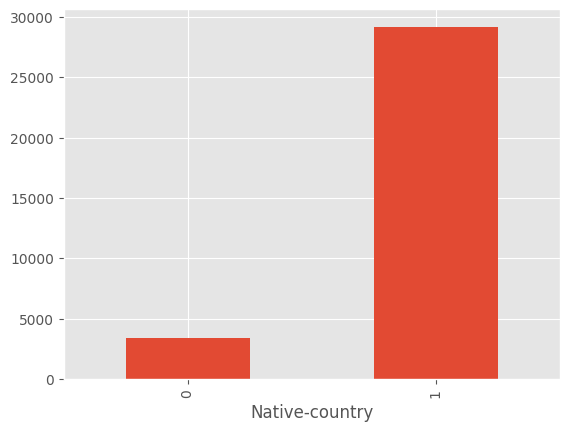

In [726]:
for variable in ["Workclass","Occupation","Native-country"]:
    group=incomeData_train.groupby([variable])
    group[variable].count().plot.bar()
    plt.show()

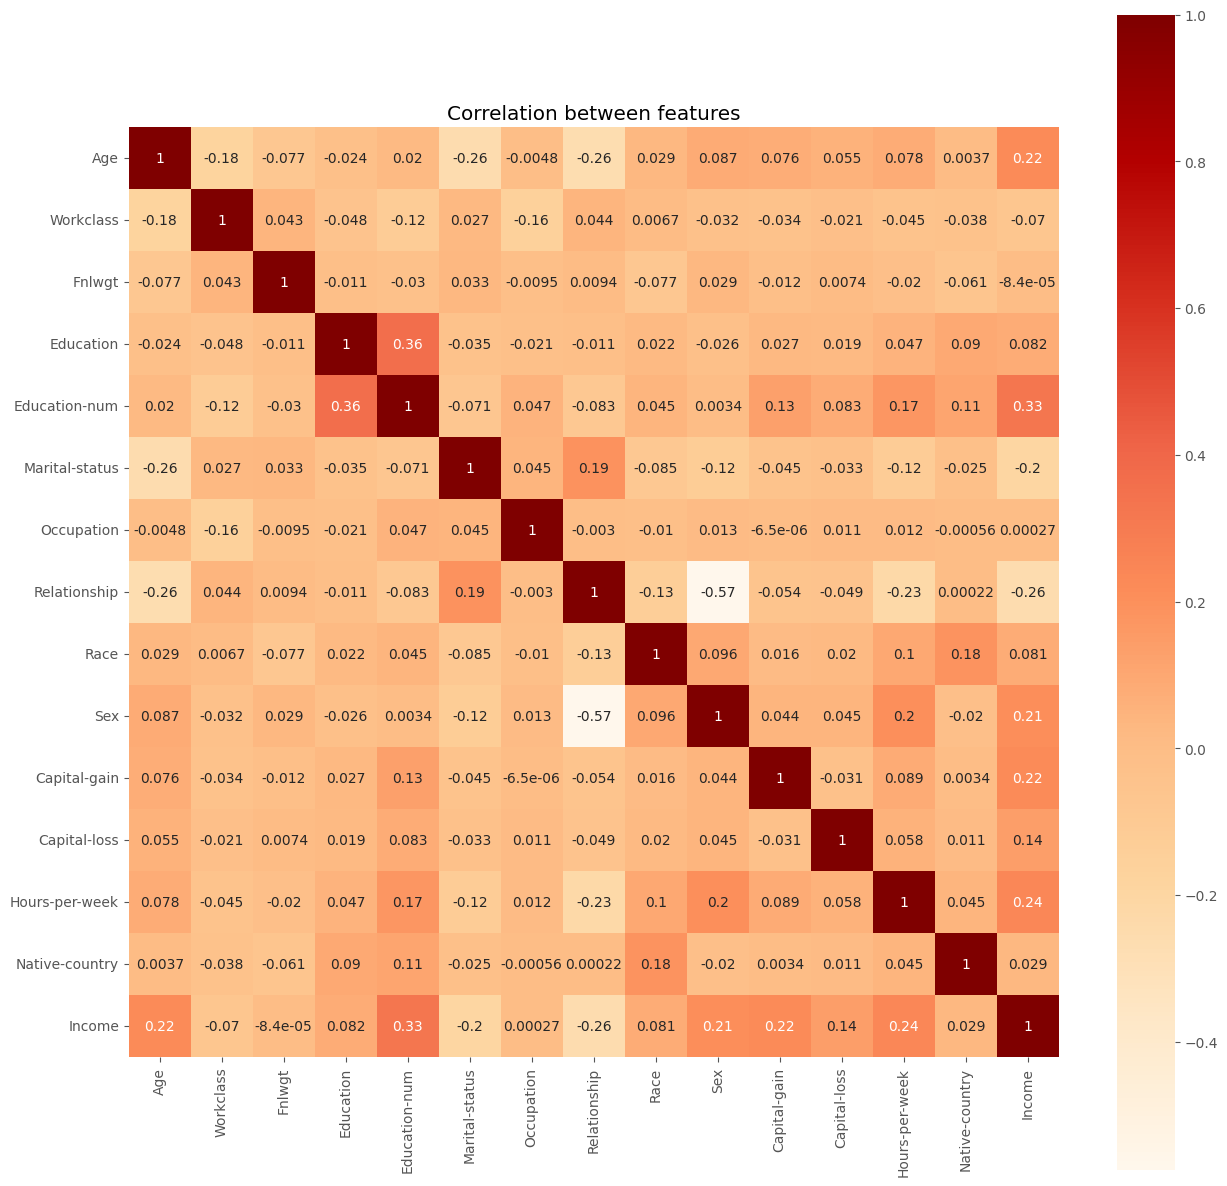

In [727]:
encodeLabel = LabelEncoder()
incomeData_train['Income'] = encodeLabel.fit_transform(incomeData_train['Income'])

for col in incomeData_train.columns:
    if incomeData_train[col].dtypes == 'object':
        le = LabelEncoder()
        incomeData_train[col] = le.fit_transform(incomeData_train[col])

corr=incomeData_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True,cmap='OrRd',annot=True)
plt.title("Correlation between features")

encodeLabel2 = LabelEncoder()
incomeData_test['Income'] = encodeLabel2.fit_transform(incomeData_test['Income'])

for col2 in incomeData_test.columns:
    if incomeData_test[col2].dtypes == 'object':
        le2 = LabelEncoder()
        incomeData_test[col2] = le2.fit_transform(incomeData_test[col2])

In [728]:
x = incomeData_train.drop(["Fnlwgt","Marital-status","Relationship","Native-country","Education","Income"],axis=1)
y = incomeData_train.Income
x2= incomeData_test.drop(["Fnlwgt","Marital-status","Relationship","Native-country","Education","Income"],axis=1)
y2=incomeData_test.Income

x_train = x
y_train = y
x_test = x2
y_test = y2
scaled = StandardScaler()

train_scaled = scaled.fit_transform(x_train)
test_scaled = scaled.transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(32561, 9)
(16281, 9)
(16281,)


In [729]:
train_scaled

array([[ 0.03067056, -1.5167923 ,  1.13473876, ...,  0.1484529 ,
        -0.21665953, -0.64569944],
       [ 0.83710898, -1.5167923 ,  1.13473876, ..., -0.14592048,
        -0.21665953, -0.64569944],
       [-0.04264203,  0.65928605, -0.42005962, ..., -0.14592048,
        -0.21665953, -0.64569944],
       ...,
       [ 1.42360965,  0.65928605, -0.42005962, ..., -0.14592048,
        -0.21665953, -0.64569944],
       [-1.21564337,  0.65928605, -0.42005962, ..., -0.14592048,
        -0.21665953, -0.64569944],
       [ 0.98373415, -1.5167923 , -0.42005962, ...,  1.88842434,
        -0.21665953, -0.64569944]])

In [730]:
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
logr_clf = LogisticRegression(random_state=42)

In [731]:
rf_clf.fit(train_scaled, y_train)
dt_clf.fit(train_scaled,y_train)
logr_clf.fit(train_scaled,y_train)

LogisticRegression(random_state=42)

In [732]:
for clf in(rf_clf,dt_clf,logr_clf):
  y_pred = clf.predict(train_scaled)
  print("The accuracy of ",clf.__class__.__name__, " is ",accuracy_score(y_train, y_pred))

The accuracy of  RandomForestClassifier  is  0.9238045514572648
The accuracy of  DecisionTreeClassifier  is  0.9238352630447468
The accuracy of  LogisticRegression  is  0.8243911427781702


In [733]:
tuned_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'max_features' : [1,2,3,4,5,6,7,8,9],
    'criterion': ["gini", "entropy"]
}

grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=tuned_params,cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search_dt.fit(train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(grid_search_dt.best_params_)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits
Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 5}


In [734]:
param_grid = { 
    'n_estimators': [50,100,150, 200, 500,1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,3,5,10,20],
    'criterion' :['gini', 'entropy']
}
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=tuned_params,cv=10, n_jobs=-1, scoring = "accuracy")
grid_search_rf.fit(train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(grid_search_rf.best_params_)

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 5}


In [735]:
param = {
        'penalty' : ['l1', 'l2'],
        'C' : [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 3.0,
                       5.0, 10.0, 15.0, 20.0],
        'solver' : ['liblinear'],
        'max_iter' : [50, 100, 150, 200]
}

grid_search_logr = GridSearchCV(estimator=logr_clf, param_grid=param,cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search_logr.fit(train_scaled, y_train)
print("Best parameters set found on development set:")
print()
print(grid_search_logr.best_params_)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best parameters set found on development set:

{'C': 0.05, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}


In [736]:
pred_trainDT = grid_search_dt.best_estimator_.predict(train_scaled)
print(f"Best parameters for DT are: {grid_search_dt.best_params_}")
print(f"Accuracy for DT on Traning set is: {round(accuracy_score(y_train, pred_trainDT), 3)}")

Best parameters for DT are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 5}
Accuracy for DT on Traning set is: 0.849


In [737]:
pred_trainRF = grid_search_rf.best_estimator_.predict(train_scaled)
print(f"Best parameters for RF are: {grid_search_rf.best_params_}, with a score of {round(grid_search_rf.best_score_,3)}")
print(f"Accuracy for RF on Traning set is: {round(accuracy_score(y_train, pred_trainRF), 3)}")

Best parameters for RF are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 5}, with a score of 0.847
Accuracy for RF on Traning set is: 0.86


In [738]:
pred_trainLOG = grid_search_logr.best_estimator_.predict(train_scaled)
print(f"Best parameters for LOG are: {grid_search_logr.best_params_}, with a score of {round(grid_search_logr.best_score_,3)}")
print(f"Accuracy for LOG on Traning set is: {round(accuracy_score(y_train, pred_trainLOG), 3)}")

Best parameters for LOG are: {'C': 0.05, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}, with a score of 0.825
Accuracy for LOG on Traning set is: 0.825


In [739]:
destree2= DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features= 7, min_samples_leaf= 5)
destree2.fit(test_scaled,y_test)
predictions = destree2.predict(test_scaled)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print('Acurracy of DT is:',accuracy_score(y_test, predictions)*100,"%")

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     12435
           1       0.77      0.51      0.61      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.73      0.76     16281
weighted avg       0.84      0.85      0.84     16281

[[11858   577]
 [ 1886  1960]]
Acurracy of DT is: 84.87193661323015 %


In [740]:
rf2= RandomForestClassifier(criterion= 'entropy', max_depth=20, max_features=2, min_samples_leaf=5)
rf2.fit(test_scaled,y_test)
predictions = rf2.predict(test_scaled)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print('Acurracy of RF is:',accuracy_score(y_test, predictions)*100,"%")

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     12435
           1       0.82      0.51      0.63      3846

    accuracy                           0.86     16281
   macro avg       0.84      0.74      0.77     16281
weighted avg       0.85      0.86      0.85     16281

[[12010   425]
 [ 1887  1959]]
Acurracy of RF is: 85.79939807137154 %


In [741]:
log2= LogisticRegression(C= 0.05, max_iter= 50, penalty= 'l2', solver= 'liblinear')
log2.fit(test_scaled,y_test)
predictions = log2.predict(test_scaled)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print('Acurracy of LOG is:',accuracy_score(y_test, predictions)*100,"%")

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.71      0.42      0.53      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.68      0.71     16281
weighted avg       0.81      0.82      0.80     16281

[[11789   646]
 [ 2242  1604]]
Acurracy of LOG is: 82.26153184693815 %


In [742]:
for clf in(rf2, destree2,log2):
  y_pred = clf.predict(test_scaled)
  print("The accuracy of ",clf.__class__.__name__, " is ",accuracy_score(y_test, y_pred))

The accuracy of  RandomForestClassifier  is  0.8579939807137154
The accuracy of  DecisionTreeClassifier  is  0.8487193661323015
The accuracy of  LogisticRegression  is  0.8226153184693815


In [743]:
def drawRocCurve(classifier, nameClassifier, train_scaled, y_train):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_train))]
    # predict probabilities
    lr_probs = classifier.predict_proba(train_scaled)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_train, ns_probs)
    lr_auc = roc_auc_score(y_train, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

Random model: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.980


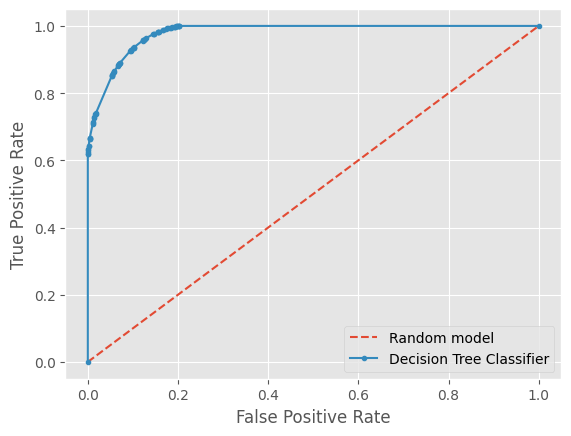

In [744]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(dt_clf, "Decision Tree Classifier", train_scaled, y_train)

Random model: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.976


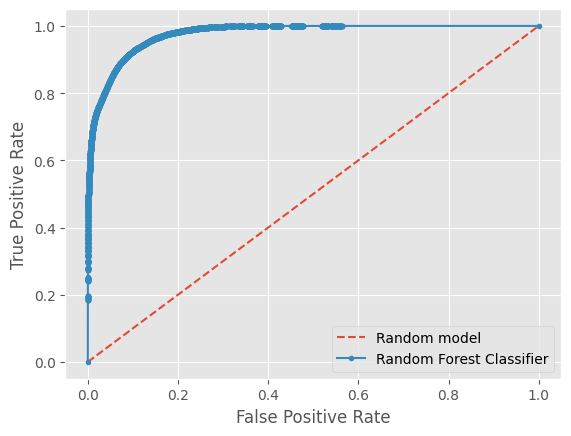

In [745]:
lr_auc_rf, lr_fpr_rf, lr_tpr_rf = drawRocCurve(rf_clf, "Random Forest Classifier", train_scaled, y_train)

Random model: ROC AUC=0.500
Logistic Regression: ROC AUC=0.844


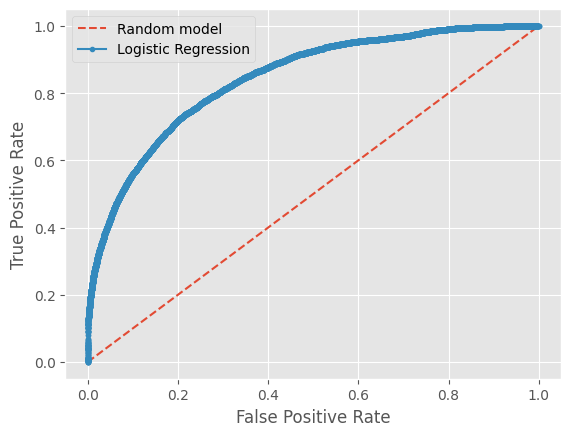

In [746]:
lr_auc_logr, lr_fpr_logr, lr_tpr_logr = drawRocCurve(logr_clf, "Logistic Regression", train_scaled, y_train)

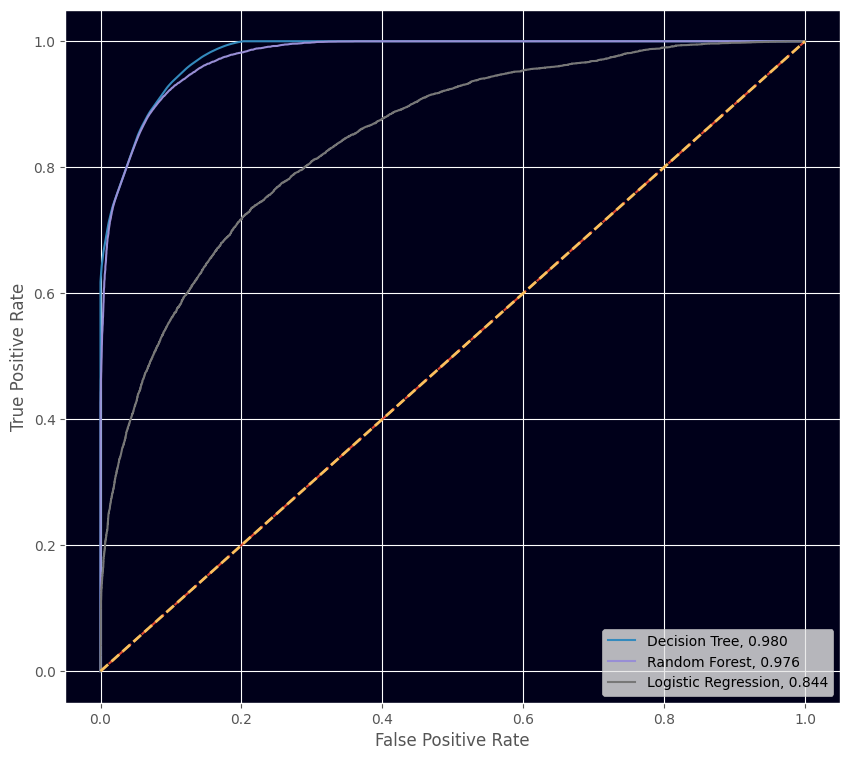

In [747]:
fig, ax = plt.subplots(figsize=(10,9))
ax.set_facecolor((0,0,0.10))

#about Random model
ns_probs = [0 for _ in range(len(y_train))]
ns_auc = roc_auc_score(y_train, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr_tree, lr_tpr_tree, label="Decision Tree, %.3f" % (lr_auc_tree))
plt.plot(lr_fpr_rf, lr_tpr_rf,  label="Random Forest, %.3f" % (lr_auc_rf))
plt.plot(lr_fpr_logr, lr_tpr_logr, label="Logistic Regression, %.3f" % (lr_auc_logr))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [748]:
def drawRocCurve(classifier, nameClassifier, test_scaled, y_test):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = classifier.predict_proba(test_scaled)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

Random model: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.889


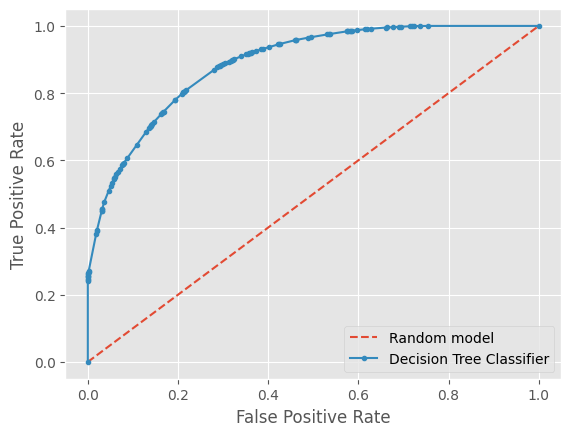

In [749]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(destree2, "Decision Tree Classifier", test_scaled, y_test)



Random model: ROC AUC=0.500
Random Forest: ROC AUC=0.915


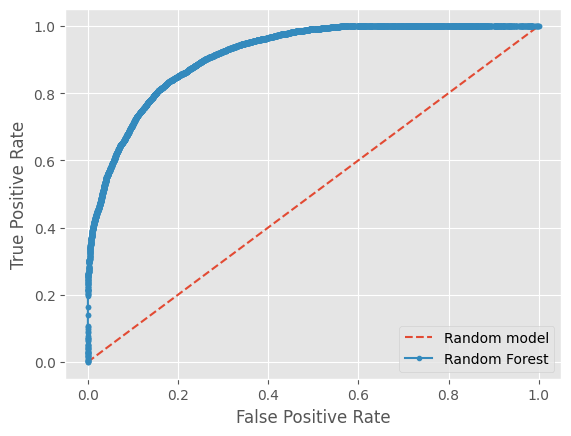

In [750]:
lr_auc_tree, lr_fpr_rf, lr_tpr_rf = drawRocCurve(rf2, "Random Forest", test_scaled, y_test)

Random model: ROC AUC=0.500
Logistic Regression: ROC AUC=0.840


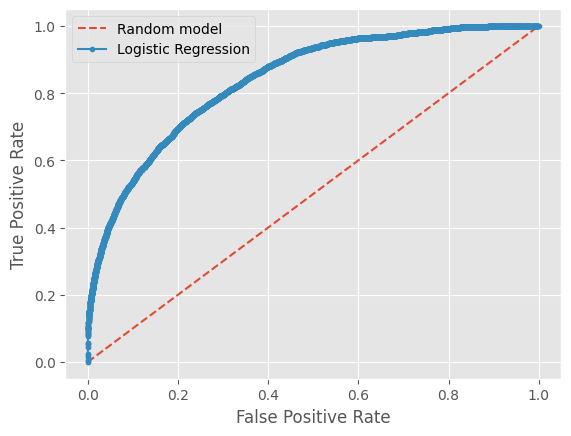

In [751]:
lr_auc_logr, lr_fpr_logr, lr_tpr_logr = drawRocCurve(log2, "Logistic Regression", test_scaled, y_test)

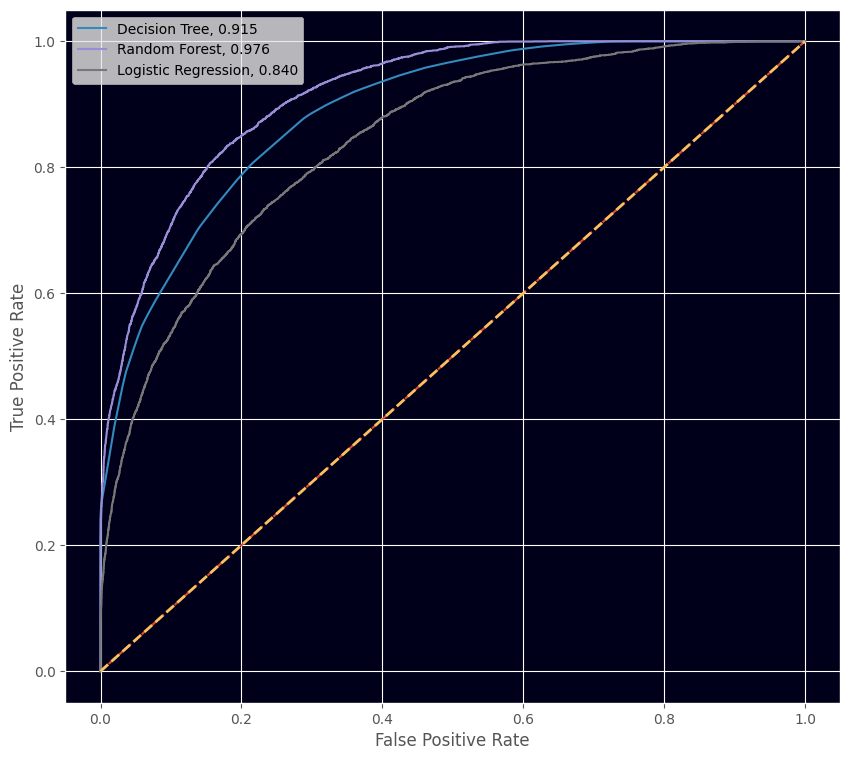

In [752]:
fig, ax = plt.subplots(figsize=(10,9))
ax.set_facecolor((0,0,0.10))

#about Random model
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr_tree, lr_tpr_tree, label="Decision Tree, %.3f" % (lr_auc_tree))
plt.plot(lr_fpr_rf, lr_tpr_rf,  label="Random Forest, %.3f" % (lr_auc_rf))
plt.plot(lr_fpr_logr, lr_tpr_logr, label="Logistic Regression, %.3f" % (lr_auc_logr))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [753]:
fs_indices_dt = np.argsort(destree2.feature_importances_)[::-1][0:7]

In [754]:
best_features_dt = x_train.columns[fs_indices_dt].values
best_features_dt

array(['Capital-gain', 'Education-num', 'Age', 'Capital-loss', 'Sex',
       'Occupation', 'Hours-per-week'], dtype=object)

In [755]:
feature_importances_dt = destree2.feature_importances_[fs_indices_dt]
feature_importances_dt

array([0.35310834, 0.21753873, 0.19291675, 0.09419241, 0.07250581,
       0.03761085, 0.0259081 ])

In [756]:

# summarize feature importance
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

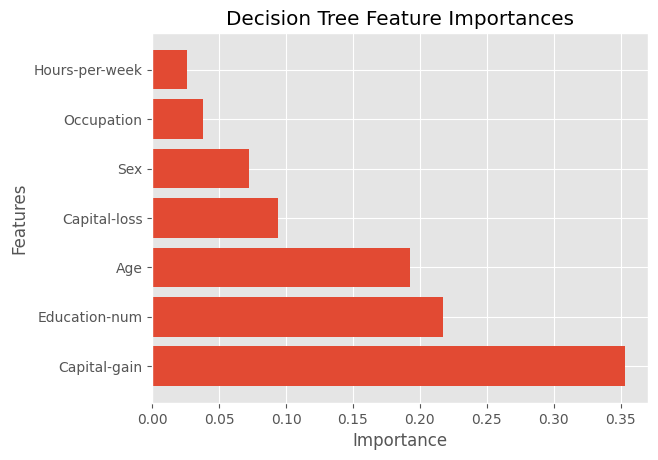

In [757]:
plot_imp(best_features_dt, feature_importances_dt, 'Decision Tree')

In [758]:
fs_indices_rfi = np.argsort(rf2.feature_importances_)[::-1][0:7]

best_features_rfi = x_test.columns[fs_indices_rfi].values
best_features_rfi
feature_importances_rfi = rf2.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.2843391 , 0.20654707, 0.19077017, 0.09716882, 0.07619736,
       0.06338418, 0.05762347])

In [759]:
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    

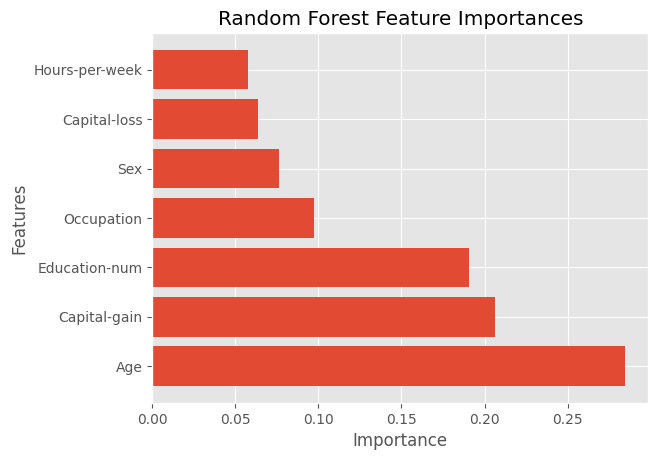

In [760]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')